# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.
## Цель лабораторной работы: изучение способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

### Задание:

Выберите набор данных (датасет) для решения задачи классификации или регрессии.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. - Оцените качество модели с помощью подходящих для задачи метрик.
Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации. Сравните метрики качества исходной и оптимальной моделей.

## Импорт библиотек и загрузка датасета

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.model_selection import train_test_split
from operator import itemgetter
import matplotlib.ticker as ticker
import math
from enum import Enum
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from typing import Dict, Tuple
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

In [ ]:
filename = 'water_potability.csv'
data = pd.read_csv(filename)

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Очистка датасета

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# проверим пропущенные значения
data.isnull().sum()

In [ ]:
strategies=['mean', 'median', 'most_frequent']

In [ ]:
# импьютация нужной колонки с помощью нужной стратегии
def func_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    return data_num_imp

In [ ]:
# замена медианой 
col_imp = func_impute_col(data, 'ph', strategies[1])
data[['ph']] = col_imp

In [ ]:
# замена медианой Sulfate
col_imp = func_impute_col(data, 'Sulfate', strategies[1])
data[['Sulfate']] = col_imp

In [ ]:
# замена медианой Trihalomethanes
col_imp = func_impute_col(data, 'Trihalomethanes', strategies[1])
data[['Trihalomethanes']] = col_imp

In [ ]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
data.isnull().sum()

### Разделение выборки на обучающую и тестовую

In [ ]:
# целевой признак - Potability  
target = data['Potability']

In [ ]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


In [ ]:
# уберем столбцы, слабо коррелирующие с целевым признаком
data_clean = data
data_clean = data_clean.drop(columns = ['ph'], axis = 1)
data_clean = data_clean.drop(columns = ['Conductivity'], axis = 1)
data_clean = data_clean.drop(columns = ['Trihalomethanes'], axis = 1)
data_clean = data_clean.drop(columns = ['Turbidity'], axis = 1)
data_clean = data_clean.drop(columns = ['Hardness'], axis = 1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data_clean,target,test_size=0.2,random_state=1)

### Обучение модели ближайших соседей для произвольно заданного гиперпараметра K

In [ ]:
def regr_to_class(y: int) -> str:
    if y==1:
        return 'Is_safe'
    else:
        return 'Not_safe'

In [ ]:
# формирование целевого признака для классификации
x_train['Potability_class'] = \
x_train.apply(lambda row: regr_to_class(row['Potability']),axis=1)

### Метод k-ближайших соседей

In [ ]:
class PredictionType(Enum):
    CLASSIFICATION = 1
    REGRESSION = 2

In [ ]:
class SimpleKNN:
    
    def fit(self, X_train: np.matrix, y_train: np.ndarray):
        """
        Метод обучения, который фактически не учится, 
        а только запоминает обучающую выборку.
        Входные параметры:
        X_train - обучающая выборка (матрица объект-признак)
        y_train - обучающая выборка (вектор целевого признака)
        Возвращаемое значение: нет
        """
        #Сохраняем параметры в переменных класса
        self._X_train = X_train
        self._y_train = y_train
          
    def eucl_dist(self, p: np.ndarray, q: np.ndarray) -> float:
        """
        Вычисление Евклидова расстояния - https://en.wikipedia.org/wiki/Euclidean_distance 
        Входные параметры:
        p, q - вектора в n-мерном пространстве признаков
        """
        return math.sqrt(sum([(pi - qi) ** 2 for pi, qi in zip (p, q)]))
            
            
    def predict_for_single_object(self, K: int, \
                prediction_type: PredictionType, \
                X_o: np.ndarray, \
                verbose = True) -> np.ndarray:
        """
        Метод предсказания для одного объекта.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_o - строка матрицы объект-признак, соответствующая объекту
        verbose - флаг детального вывода
        Возвращаемое значение: предсказанное значение целевого признака
        """
        # список соседей
        neighbors_list = []
        # *** Находим ближайшие точки ***
        # Перебираем все точки обучающей выборки
        for i in range(self._X_train.shape[0]):
            # получаем текущую точку
            data_train_current_x = [x for x in self._X_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']].iloc[i]]
            # и значение ее y
            data_train_current_y = self._y_train.values[i]
            # вычисляем расстояние
            dist = self.eucl_dist(X_o, data_train_current_x)
            # сохраняем в список соседей
            temp_res = (data_train_current_y, dist, data_train_current_x)
            neighbors_list.append(temp_res)
        # *** сортируем список соседей по возрастанию расстояния *** 
        # в кортеже элементы следуют в порядке (0,1,2), сортируем по первому элементу 
        neighbors_list_sorted = sorted(neighbors_list, key=itemgetter(1))
        if verbose:
            print()
            print('**************************************')
            print('Проверяемая точка: ', X_o)
            print('**************************************')
            print('Вывод отсортированного списка соседей:')    
            dist_list = []
            for cur_y, cur_dist, temp_x_1_2 in neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                print('X1={0}, X2={1}, y={2}, расстояние={3:.2f}'.format(temp_x1, temp_x2, cur_y, cur_dist))
                dist_list.append(cur_dist)
            print()
            print('Вывод расстояния для отсортированного списка соседей:')    
            plt.plot(dist_list)
            plt.show()
        # Оставим только K ближайших соседей
        K_neighbors_list_sorted = neighbors_list_sorted[:K]
        if verbose:
            print('Вывод К ближайших соседей:')
            x1_list = []
            x2_list = []
            for cur_y, cur_dist, temp_x_1_2 in K_neighbors_list_sorted:
                temp_x1, temp_x2 = temp_x_1_2
                x1_list.append(temp_x1)
                x2_list.append(temp_x2)
                print('X1={0}, X2={1}, y={2}, расстояние={3:.2f}'.format(temp_x1, temp_x2, cur_y, cur_dist))
            print()
            print('Визуализация К ближайших соседей:')
            plt.plot(self._X_train['x1'], self._X_train['x2'], 'b.', \
                     x1_list, x2_list,  'g*', \
                    [X_o[0]], [X_o[1]], 'ro')
            plt.show()   
        # Результат - классификация или регрессия
        if prediction_type == PredictionType.REGRESSION:
            # используем numpy для вычисления среднего значения
            arr = np.array([x for x,_,_ in K_neighbors_list_sorted])
            # возвращаем среднее значение
            return np.mean(arr)          
        elif prediction_type == PredictionType.CLASSIFICATION:
            k_y_list = [y for y,_,_ in K_neighbors_list_sorted]
            # группируем с количеством метки классов,
            # соответствующие K ближайшим соседям
            k_y_list_grouped_temp = np.unique(k_y_list, return_counts=True)
            k_y_list_grouped = [[key, cnt] for key, cnt in zip(k_y_list_grouped_temp[0], k_y_list_grouped_temp[1])]
            # сортируем по количеству по убыванию
            k_y_list_grouped_sorted = sorted(k_y_list_grouped, key=itemgetter(1), reverse=True)
            if verbose:
                print('Классы, соответствующие К ближайшим соседям:')
                for i in k_y_list_grouped_sorted:
                    print('класс={0}, количество элементов={1}'.format(i[0], i[1]))
            # возвращаеv метку класса из первой строки отсортированного массива
            # то есть того класса, к которому принадлежит наибольшее количество соседей
            return k_y_list_grouped_sorted[0][0]
        else:
            raise Exception('Неизвестный тип предсказания')
                   
    
    def predict(self, K: int, \
                prediction_type: PredictionType, \
                X_test: np.matrix, 
                verbose = True) -> np.ndarray:
        """
        Метод предсказания.
        Входные параметры:
        K - гиперпараметр, количество соседей 
        prediction_type - классификация или регрессия 
        X_test - тестовая выборка (матрица объект-признак)
        Возвращаемое значение: предсказанный вектор целевого признака
        """
        # Перебираем все точки тестовой выборки
        test_data_temp = []
        for i in range(X_test.shape[0]):
            # получаем текущую точку
            data_test_current_x = [x for x in X_test.iloc[i]]
            test_data_temp.append(data_test_current_x)    
   
        return [self.predict_for_single_object(K=K, \
                prediction_type=prediction_type, \
                X_o=i, verbose=verbose) for i in test_data_temp]

### Обучение

In [ ]:
x_train.head()

,Solids,Chloramines,Sulfate,Organic_carbon,Potability,Potability_class
675,20225.642923,7.569518,352.685843,19.621923,1,Is_safe
1359,6626.376426,5.117364,372.625257,23.135952,0,Not_safe
1391,16795.318674,6.708068,326.952617,12.510887,0,Not_safe
1727,18535.046452,5.497159,339.838977,14.979000,0,Not_safe
1677,30210.250367,9.508299,340.245766,23.234326,0,Not_safe


In [ ]:
# классификация
simple_knn_class = SimpleKNN()
simple_knn_class.fit(x_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']], x_train['Potability_class'])

In [ ]:
simple_knn_class._X_train

,Solids,Chloramines,Sulfate,Organic_carbon
675,20225.642923,7.569518,352.685843,19.621923
1359,6626.376426,5.117364,372.625257,23.135952
1391,16795.318674,6.708068,326.952617,12.510887
1727,18535.046452,5.497159,339.838977,14.979000
1677,30210.250367,9.508299,340.245766,23.234326
...,...,...,...,...
2763,23347.172710,9.000395,333.073546,14.173906
905,34160.925144,8.963156,363.472798,15.905270
1096,45141.686036,6.030640,240.198505,20.605552
235,17650.405049,8.121080,350.487939,10.999416


In [ ]:
simple_knn_class._y_train

### Предсказание

In [ ]:
# первая строка тестовой выборки
data_test_0 = [x for x in x_test[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']].iloc[0]]
data_test_0

[14775.14559575291, 7.484103646670236, 305.82855327870027, 12.309015955365226]

In [ ]:
# построим предсказание для одного объекта (классификация)
simple_knn_class_0 = simple_knn_class.predict_for_single_object(K=5, \
                          prediction_type=PredictionType.CLASSIFICATION, \
                          X_o=data_test_0, verbose=False)
simple_knn_class_0

'Not_safe'

### Метод К ближайших соседей: использование класса scikit-learn

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model

KNeighborsClassifier(n_neighbors=3) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. KNeighborsClassifier KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(x_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']], y_train)
m_predict = model.predict(x_test[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']])
m_predict_train = model.predict(x_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']])

In [ ]:
#модель с 10 ближайшими соседями
model2 = KNeighborsClassifier(n_neighbors=10)
model2.fit(x_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']], y_train)
m2_predict = model2.predict(x_test[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']])

### Оценка качества модели
#### Метрики качества классификации

Accuracy

Матрица ошибок или Confusion Matrix

Precision, recall и F-мера

ROC-кривая и ROC AUC

Кривая precision-recall

Логистическая функция потерь - log loss

In [ ]:
# 1 параметр - эталонное значение классов из исходной (тестовой) выборки
# 2 параметр - предсказанное значение классов

# 3 ближайших соседа
accuracy_score(y_test, m_predict)

0.5274390243902439

In [ ]:
# 10 ближайших соседей
accuracy_score(y_test, m2_predict)

0.5685975609756098

In [ ]:
# 3 ближайших соседа
balanced_accuracy_score(y_test, m_predict)

0.5000426301878571

In [ ]:
# 10 ближайших соседей
balanced_accuracy_score(y_test, m2_predict)

0.5170520751428112

In [ ]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [ ]:
# 3 ближайших соседа
print_accuracy_score_for_classes(y_test, m_predict)

Метка 	 Accuracy
0 	 0.6997319034852547
1 	 0.3003533568904594


In [ ]:
# 10 ближайших соседей
print_accuracy_score_for_classes(y_test, m2_predict)

Метка 	 Accuracy
0 	 0.8927613941018767
1 	 0.1413427561837456


### Матрица ошибок

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, m_predict).ravel()
tn, fp, fn, tp

(261, 112, 198, 85)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


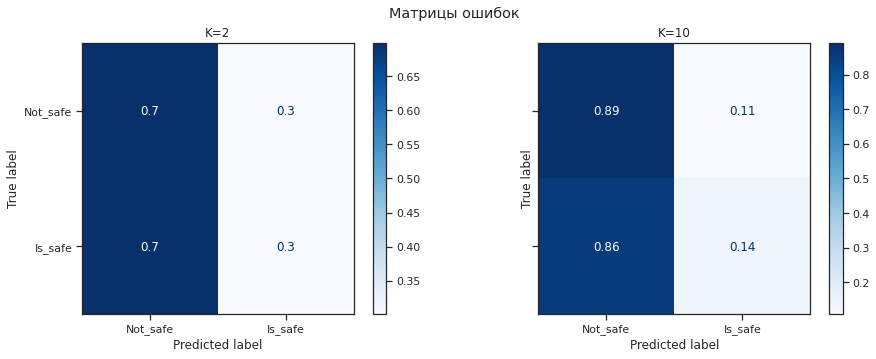

In [ ]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))
labels = ['Not_safe', 'Is_safe']

plot_confusion_matrix(model, x_test[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']], y_test,
                      display_labels=labels, cmap=plt.cm.Blues, normalize='true', ax=ax[0])

plot_confusion_matrix(model2, x_test[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']], y_test,
                      display_labels=labels, cmap=plt.cm.Blues, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('K=2')
ax[1].title.set_text('K=10')

### Precision, recall и F-мера

In [ ]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 3 и 10 ближайших соседей
precision_score(y_test, m_predict), precision_score(y_test, m2_predict)

(0.43147208121827413, 0.5)

In [ ]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(y_test, m_predict, average='micro'), precision_score(y_test, m2_predict, average='micro')

(0.5274390243902439, 0.5685975609756098)

In [ ]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(y_test, m_predict, average='macro'), precision_score(y_test, m2_predict, average='macro')

(0.5000497660993332, 0.5390625)

In [ ]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется средневзвешенное значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(y_test, m_predict, average='weighted'), precision_score(y_test, m2_predict, average='weighted')

(0.5094582899397223, 0.5444216844512195)

### Recall (полнота)

In [ ]:
# Для 3 и 10 ближайших соседей
recall_score(y_test, m_predict), recall_score(y_test, m2_predict)

(0.3003533568904594, 0.1413427561837456)

### F-мера

In [ ]:
# Для 3 и 10 ближайших соседей
fbeta_score(y_test, m_predict, average='macro', beta=0.5), fbeta_score(y_test, m2_predict, average='macro', beta=0.5)

(0.4937952244425762, 0.4768199223035613)

### Удобный вывод метрик

In [ ]:
# Для 3 и 10 ближайших соседей
classification_report(y_test, m_predict, target_names=['Not_safe', 'Is_safe'], output_dict=True), \
 classification_report(y_test, m2_predict, target_names=['Not_safe', 'Is_safe'], output_dict=True)

({'Not_safe': {'precision': 0.5686274509803921,
   'recall': 0.6997319034852547,
   'f1-score': 0.6274038461538461,
   'support': 373},
  'Is_safe': {'precision': 0.43147208121827413,
   'recall': 0.3003533568904594,
   'f1-score': 0.3541666666666667,
   'support': 283},
  'accuracy': 0.5274390243902439,
  'macro avg': {'precision': 0.5000497660993332,
   'recall': 0.5000426301878571,
   'f1-score': 0.4907852564102564,
   'support': 656},
  'weighted avg': {'precision': 0.5094582899397223,
   'recall': 0.5274390243902439,
   'f1-score': 0.5095286604909318,
   'support': 656}},
 {'Not_safe': {'precision': 0.578125,
   'recall': 0.8927613941018767,
   'f1-score': 0.701791359325606,
   'support': 373},
  'Is_safe': {'precision': 0.5,
   'recall': 0.1413427561837456,
   'f1-score': 0.22038567493112948,
   'support': 283},
  'accuracy': 0.5685975609756098,
  'macro avg': {'precision': 0.5390625,
   'recall': 0.5170520751428112,
   'f1-score': 0.46108851712836774,
   'support': 656},
  'weig

### ROC-кривая(кривая ошибок) и ROC AUC

In [ ]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

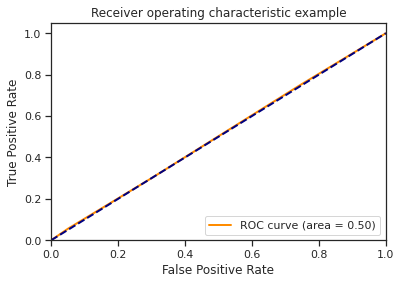

In [ ]:
# для 3 соседей
m_proba = model.predict_proba(x_test[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']])
true_m_proba = m_proba[:,1]
roc_curve_k10_res = roc_curve(y_test, true_m_proba, pos_label=1)
draw_roc_curve(y_test, true_m_proba, pos_label=1, average='micro')

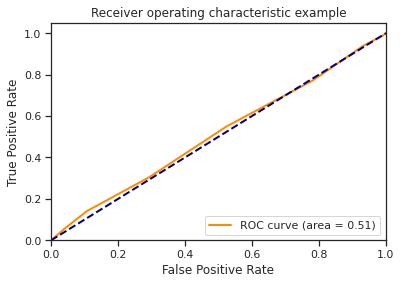

In [ ]:
# для 10 соседей
m2_proba = model2.predict_proba(x_test[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']])
true_m2_proba = m2_proba[:,1]
roc_curve_k10_res = roc_curve(y_test, true_m2_proba, pos_label=1)
draw_roc_curve(y_test, true_m2_proba, pos_label=1, average='micro')

### Подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации

In [ ]:
# удалим target из выборки
data_clean2 = data_clean.drop(columns = ['Potability'], axis = 1)
# переведем в numpy array
data_clean2_np = data_clean2.to_numpy()
target2 = target.to_numpy()

### Кросс-валидация (скользящий контроль, перекрестная проверка), cross-validation)
Данные разбиваются на k частей (fold-ов). Кол-во fold-oв - сv. \ Затем на k−1 частях данных производится обучение модели, а оставшаяся часть данных используется для тестирования. Процедура повторяется k раз; в итоге каждая из k частей данных используется для тестирования. В результате получается оценка эффективности выбранной модели с наиболее равномерным использованием имеющихся данных.
### Стратегии кросс валидации (CV): K-fold

In [ ]:
# разбивает на 3 блока всевозможными способами и вовращает 2 выборки
# тестовая - 1 блок, обучающая - остальные блоки
cv_kf = KFold(n_splits=3)
for train_index, test_index in cv_kf.split(data_clean2):
     print("TRAIN:", train_index, "TEST:", test_index)
     x2_train, x2_test = data_clean2_np[train_index], data_clean2_np[test_index]
     y2_train, y2_test = target2[train_index], target2[test_index]
     print("x2_train: ", x2_train.shape, "\nx2_test: ", x2_test.shape, "y2_train: ", y2_train.shape, "\ny2_test: ", y2_test.shape)

### CV: Repeated K-Fold

In [ ]:
kf = RepeatedKFold(n_splits=3, n_repeats=2)
for train_index, test_index in kf.split(data_clean2):
     print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [   0    1    3 ... 3271 3273 3275] TEST: [   2    5   10 ... 3266 3272 3274]
TRAIN: [   2    3    5 ... 3273 3274 3275] TEST: [   0    1    4 ... 3267 3268 3270]
TRAIN: [   0    1    2 ... 3270 3272 3274] TEST: [   3   11   12 ... 3271 3273 3275]
TRAIN: [   0    1    3 ... 3269 3270 3272] TEST: [   2    6    8 ... 3273 3274 3275]
TRAIN: [   0    2    4 ... 3273 3274 3275] TEST: [   1    3    7 ... 3267 3268 3270]
TRAIN: [   1    2    3 ... 3273 3274 3275] TEST: [   0    4    5 ... 3265 3269 3272]


### CV: Leave One Out (LOO)

In [ ]:
kf = LeaveOneOut()

### CV: Leave P Out (LPO)

In [ ]:
kf = LeavePOut(100)

### CV: ShuffleSplit

In [ ]:
kf = ShuffleSplit(n_splits=5, test_size=0.25)

### CV: StratifiedKFold, StratifiedShuffleSplit

In [ ]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [ ]:
print_class_proportions(target)

Метка 	 Количество 	 Процент встречаемости
0 	 1998 	 	 60.99%
1 	 1278 	 	 39.01%


In [ ]:
kf = StratifiedKFold(n_splits=3)
for train_index, test_index in kf.split(data_clean2, target):
     print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 986  987  988 ... 3273 3274 3275] TEST: [   0    1    2 ... 1173 1174 1175]
TRAIN: [   0    1    2 ... 3273 3274 3275] TEST: [ 986  987  988 ... 2349 2350 2351]
TRAIN: [   0    1    2 ... 2349 2350 2351] TEST: [2132 2133 2134 ... 3273 3274 3275]


### Автоматическое определение стратегии кросс-валидации

In [ ]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data_clean2, target, cv=3,
                        scoring='f1_weighted')
scores, np.mean(scores)

(array([0.53300914, 0.53450832, 0.52546197]), 0.530993145112893)

In [ ]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        data_clean2, target, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00414562, 0.00353241, 0.00362825]),
 'score_time': array([0.0474968 , 0.04678488, 0.04644966]),
 'test_precision': array([0.54103369, 0.55821346, 0.53512798]),
 'train_precision': array([0.83137748, 0.8243021 , 0.83282031]),
 'test_recall': array([0.58424908, 0.59981685, 0.58333333]),
 'train_recall': array([0.76694139, 0.75320513, 0.76968864]),
 'test_f1': array([0.53300914, 0.53450832, 0.52546197]),
 'train_f1': array([0.7359999 , 0.71687924, 0.73974906])}

### Оптимизация гиперпараметров
#### Grid Search (решетчатый поиск)

In [ ]:
# массив гиперпараметров для проверки
n_range = np.array(range(5,105,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters, len(n_range)

([{'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
           70,  75,  80,  85,  90,  95, 100])}],
 20)

In [ ]:
%%time
m_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
m_gs.fit(x_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']], y_train)

CPU times: user 2.81 s, sys: 0 ns, total: 2.81 s
Wall time: 2.82 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
 param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
 70, 75, 80, 85, 90, 95, 100])}],
 scoring='accuracy') In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GridSearchCV GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
 param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
 70, 75, 80, 85, 90, 95, 100])}],
 scoring='accuracy') estimator: KNeighborsClassifier KNeighborsClassifier() KNeighborsClassifier KNeighborsClassifier()

### Randomized Search (случайный поиск)

In [ ]:
%%time
m_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
m_rs.fit(x_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']], y_train)

CPU times: user 1.39 s, sys: 0 ns, total: 1.39 s
Wall time: 1.39 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
 param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
 70, 75, 80, 85, 90, 95, 100])}],
 scoring='accuracy') In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomizedSearchCV RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
 param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
 70, 75, 80, 85, 90, 95, 100])}],
 scoring='accuracy') estimator: KNeighborsClassifier KNeighborsClassifier() KNeighborsClassifier KNeighborsClassifier()

### Оценка качества оптимальной модели для grid и randomized search

In [ ]:
df_gs = pd.DataFrame(m_gs.cv_results_)
df_rs = pd.DataFrame(m_rs.cv_results_)
print(df_gs.shape, df_rs.shape)

(20, 14) (10, 14)


In [ ]:
df_gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003536,0.000171,0.021968,0.001087,5,{'n_neighbors': 5},0.543893,0.568702,0.540076,0.578244,0.566794,0.559542,0.014900,20
1,0.003400,0.000038,0.022006,0.000226,10,{'n_neighbors': 10},0.601145,0.595420,0.595420,0.604962,0.574427,0.594275,0.010564,18
2,0.005560,0.004069,0.022303,0.000307,15,{'n_neighbors': 15},0.601145,0.583969,0.574427,0.604962,0.574427,0.587786,0.013000,19
3,0.003391,0.000064,0.022184,0.000302,20,{'n_neighbors': 20},0.610687,0.597328,0.589695,0.620229,0.589695,0.601527,0.012094,16
4,0.003413,0.000039,0.022401,0.000178,25,{'n_neighbors': 25},0.601145,0.595420,0.593511,0.608779,0.587786,0.597328,0.007141,17
5,0.003339,0.000014,0.022467,0.000112,30,{'n_neighbors': 30},0.603053,0.614504,0.601145,0.624046,0.603053,0.609160,0.008820,13
6,0.003426,0.000011,0.022935,0.000105,35,{'n_neighbors': 35},0.601145,0.606870,0.597328,0.620229,0.603053,0.605725,0.007878,15
7,0.003320,0.000024,0.023421,0.000188,40,{'n_neighbors': 40},0.610687,0.612595,0.603053,0.620229,0.599237,0.609160,0.007381,13
8,0.003411,0.000017,0.023739,0.000162,45,{'n_neighbors': 45},0.620229,0.608779,0.597328,0.625954,0.595420,0.609542,0.012106,12
9,0.003312,0.000108,0.023921,0.000240,50,{'n_neighbors': 50},0.618321,0.610687,0.612595,0.624046,0.610687,0.615267,0.005205,11


In [ ]:
df_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003240,0.000082,0.023346,0.000160,40,{'n_neighbors': 40},0.610687,0.612595,0.603053,0.620229,0.599237,0.609160,0.007381,7
1,0.003430,0.000017,0.023960,0.000369,50,{'n_neighbors': 50},0.618321,0.610687,0.612595,0.624046,0.610687,0.615267,0.005205,6
2,0.003272,0.000081,0.020927,0.000178,10,{'n_neighbors': 10},0.601145,0.595420,0.595420,0.604962,0.574427,0.594275,0.010564,10
3,0.003296,0.000058,0.025617,0.000141,90,{'n_neighbors': 90},0.622137,0.620229,0.618321,0.622137,0.618321,0.620229,0.001707,2
4,0.003331,0.000047,0.024914,0.000190,75,{'n_neighbors': 75},0.612595,0.620229,0.618321,0.629771,0.614504,0.619084,0.005986,4
5,0.003307,0.000036,0.021968,0.000058,30,{'n_neighbors': 30},0.603053,0.614504,0.601145,0.624046,0.603053,0.609160,0.008820,7
6,0.003353,0.000052,0.026209,0.000140,95,{'n_neighbors': 95},0.620229,0.620229,0.618321,0.624046,0.618321,0.620229,0.002091,3
7,0.003389,0.000012,0.022022,0.000207,25,{'n_neighbors': 25},0.601145,0.595420,0.593511,0.608779,0.587786,0.597328,0.007141,9
8,0.003299,0.000073,0.025525,0.000325,85,{'n_neighbors': 85},0.625954,0.620229,0.620229,0.629771,0.618321,0.622901,0.004284,1
9,0.003212,0.000065,0.024180,0.000083,65,{'n_neighbors': 65},0.618321,0.614504,0.618321,0.625954,0.616412,0.618702,0.003892,5


In [ ]:
n_range_rs = np.array(list(map(lambda x: x['n_neighbors'], df_rs.params)))
gs_score = list(zip(n_range_rs, m_rs.cv_results_['mean_test_score']))
gs_score_sorted = sorted(gs_score, key=lambda val: val[0])
gs_sorted_neighbors = [x[0] for x in gs_score_sorted]
gs_mean_test_score = [x[1] for x in gs_score_sorted]

In [ ]:
# Лучшая модель
m_gs.best_estimator_, m_rs.best_estimator_

(KNeighborsClassifier(n_neighbors=85), KNeighborsClassifier(n_neighbors=85))

In [ ]:
# Лучшее значение метрики
m_gs.best_score_, m_rs.best_score_

(0.6229007633587786, 0.6229007633587786)

In [ ]:
# Лучшее значение параметров
m_gs.best_params_, m_rs.best_params_

({'n_neighbors': 85}, {'n_neighbors': 85})

In [ ]:
m_gs.best_index_

16

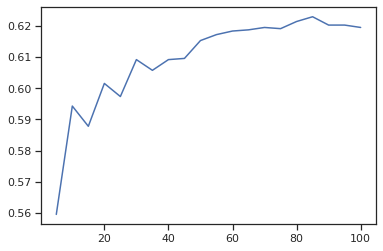

In [ ]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, m_gs.cv_results_['mean_test_score'])

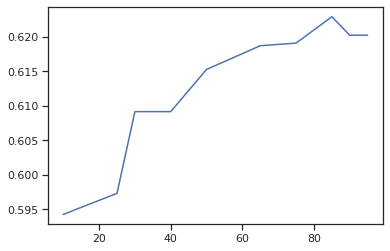

In [ ]:
plt.plot(gs_sorted_neighbors, gs_mean_test_score)

### Построение кривых обучения и валидации

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

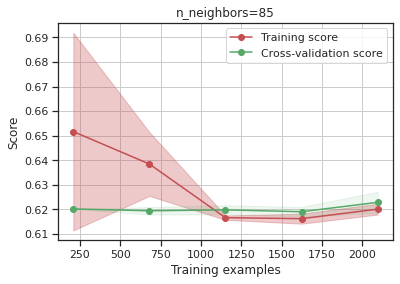

In [ ]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=85), 'n_neighbors=85', 
                    x_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']], y_train, cv=5)

In [ ]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

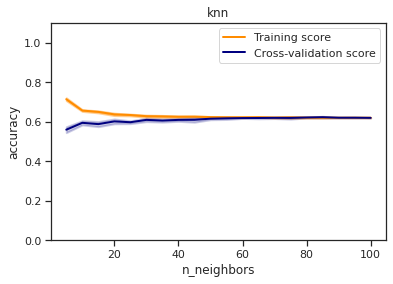

In [ ]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      x_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']], y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=5, scoring="accuracy")

### Поиск оптимальной модели и сравнение с исходной

In [ ]:
n_splits_arr = [2, 3, 5, 10, 20]

In [ ]:
scores_all = []
for n_splits in n_splits_arr:
  cv_strategies = [('KFold', KFold(n_splits=n_splits)), ('ShuffleSplit', ShuffleSplit(n_splits=n_splits, test_size=0.25)), \
                    ('StratifiedKFold', StratifiedKFold(n_splits=n_splits)), ('StratifiedShuffleSplit', StratifiedShuffleSplit(n_splits=n_splits))]

  for cv_strategy in cv_strategies:
    gs_model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=cv_strategy[1], scoring='accuracy')
    gs_model.fit(data_clean2, target)
    scores_all.append({
        'score': gs_model.best_score_,
        'model' : gs_model.best_estimator_,
        'n_splits' : n_splits,
        'cv_strategy' : cv_strategy[0],
        })

In [ ]:
scores_sorted = sorted(scores_all, key=lambda val: val['score'])

In [ ]:
scores_sorted

[{'score': 0.5938135938135938,
  'model': KNeighborsClassifier(n_neighbors=90),
  'n_splits': 3,
  'cv_strategy': 'ShuffleSplit'},
 {'score': 0.5939043094418673,
  'model': KNeighborsClassifier(n_neighbors=100),
  'n_splits': 20,
  'cv_strategy': 'KFold'},
 {'score': 0.599023199023199,
  'model': KNeighborsClassifier(n_neighbors=70),
  'n_splits': 5,
  'cv_strategy': 'ShuffleSplit'},
 {'score': 0.6004273504273504,
  'model': KNeighborsClassifier(n_neighbors=80),
  'n_splits': 3,
  'cv_strategy': 'KFold'},
 {'score': 0.6025641025641025,
  'model': KNeighborsClassifier(n_neighbors=80),
  'n_splits': 2,
  'cv_strategy': 'ShuffleSplit'},
 {'score': 0.6037387185798464,
  'model': KNeighborsClassifier(n_neighbors=70),
  'n_splits': 10,
  'cv_strategy': 'KFold'},
 {'score': 0.6037469744926456,
  'model': KNeighborsClassifier(n_neighbors=60),
  'n_splits': 5,
  'cv_strategy': 'KFold'},
 {'score': 0.6045731707317072,
  'model': KNeighborsClassifier(n_neighbors=100),
  'n_splits': 10,
  'cv_stra

In [ ]:
scores_sorted[-1]

{'score': 0.6117216117216118,
 'model': KNeighborsClassifier(n_neighbors=55),
 'n_splits': 2,
 'cv_strategy': 'StratifiedKFold'}

In [ ]:
scores_opt = []
cv_opt = StratifiedShuffleSplit(n_splits=2, test_size=0.25)
for train_index, test_index in cv_opt.split(data_clean2, target):
    #  print("TRAIN:", train_index, "TEST:", test_index)
     x2_train, x2_test = data_clean2_np[train_index], data_clean2_np[test_index]
     y2_train, y2_test = target2[train_index], target2[test_index]
     model_opt = KNeighborsClassifier(n_neighbors=30)
     model_opt.fit(x2_train, y2_train)
     m_opt_predict_test = model_opt.predict(x2_test)
     m_opt_predict_train = model_opt.predict(x2_train)
    #  classification_report(y2_test, m_opt_predict, target_names=['Not_safe', 'Is_safe'], output_dict=True)
     scores_opt.append((accuracy_score(y2_train, m_opt_predict_train), accuracy_score(y2_test, m_opt_predict_test)))

In [ ]:
scores_opt = []
type(scores_opt)

list

In [ ]:
p = [15, 19]
p.append(0)
print(p)

[15, 19, 0]


In [ ]:
# точность оптимальной модели
scores_opt

[]

In [ ]:
# точность исходной модели
(accuracy_score(y_train, m_predict_train), accuracy_score(y_test, m_predict))

(0.7698473282442748, 0.5274390243902439)

In [ ]:
x_test.head()

,Solids,Chloramines,Sulfate,Organic_carbon,Potability
136,14775.145596,7.484104,305.828553,12.309016,0
600,27071.118618,6.220936,298.112645,16.768945,0
1784,50279.262429,5.905056,415.450810,11.949854,0
3061,40175.206091,7.487423,309.800796,11.186739,0
2779,21379.963927,5.407692,227.665635,15.772334,1


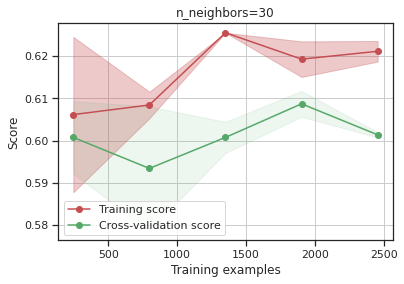

In [ ]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=30), 'n_neighbors=30', 
                    data_clean2, target, cv=StratifiedShuffleSplit(n_splits=2, test_size=0.25))

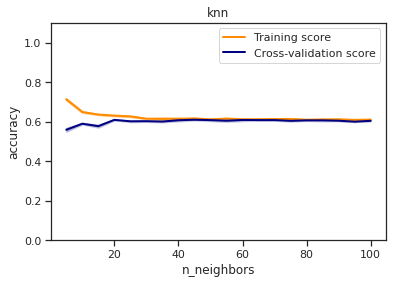

In [ ]:
plot_validation_curve(KNeighborsClassifier(n_neighbors=30), 'knn', 
                      data_clean2, target, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=StratifiedShuffleSplit(n_splits=2, test_size=0.25), scoring="accuracy")

### Исходная модель

In [ ]:
x_test.shape, x_train.shape, data_clean.shape

((656, 5), (2620, 6), (3276, 5))

In [ ]:
kf4 = LeavePOut(656)
model4 = KNeighborsClassifier(n_neighbors=3)
for train_index, test_index in kf4.split(data_clean2):
  # print("TRAIN:", train_index, "TEST:", test_index)
  x4_train, x4_test = data_clean2_np[train_index], data_clean2_np[test_index]
  y4_train, y4_test = target2[train_index], target2[test_index]
  model4.fit(x4_train, y4_train)
  m4_predict_test = model4.predict(x4_test)
  m4_predict_train = model4.predict(x4_train)
  print((accuracy_score(y4_train, m4_predict_train), accuracy_score(y4_test, m4_predict_test)))
  break

(0.7645038167938931, 0.5838414634146342)


In [ ]:
model3 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
model3.fit(data_clean2, target)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
 param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
 70, 75, 80, 85, 90, 95, 100])}],
 scoring='accuracy') In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GridSearchCV GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
 param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
 70, 75, 80, 85, 90, 95, 100])}],
 scoring='accuracy') estimator: KNeighborsClassifier KNeighborsClassifier() KNeighborsClassifier KNeighborsClassifier()

### Проверка качества с помощью LeaveOneOut

In [ ]:
# Оценка качества модели с использованием кросс-валидации
scores2 = cross_val_score(KNeighborsClassifier(n_neighbors=50), 
                         data_clean2, target, 
                         cv=LeaveOneOut())

In [ ]:
scores2, np.mean(scores2)

(array([1., 1., 1., ..., 0., 0., 0.]), 0.5952380952380952)

In [ ]:
model3 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
model3.fit(data_clean2, target)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
 param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
 70, 75, 80, 85, 90, 95, 100])}],
 scoring='accuracy') In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GridSearchCV GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
 param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65,
 70, 75, 80, 85, 90, 95, 100])}],
 scoring='accuracy') estimator: KNeighborsClassifier KNeighborsClassifier() KNeighborsClassifier KNeighborsClassifier()

In [ ]:
model3.best_estimator_

KNeighborsClassifier(n_neighbors=35) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. KNeighborsClassifier KNeighborsClassifier(n_neighbors=35)

In [ ]:
model3.best_params_, model3.best_score_

({'n_neighbors': 35}, 0.6062271062271062)

In [ ]:
# Обучение модели и оценка качества с учетом подобранных гиперпараметров
model3.best_estimator_.fit(x_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']], y_train)
target2_0 = model3.best_estimator_.predict(x_train[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']])
target2_1 = model3.best_estimator_.predict(x_test[['Solids','Chloramines', 'Sulfate', 'Organic_carbon']])

In [ ]:
# Новое качество модели
accuracy_score(y_train, target2_0), accuracy_score(y_test, target2_1)

(0.6229007633587786, 0.5655487804878049)

### Проверка для малого количества соседей

In [ ]:
# массив гиперпараметров для проверки
n_range2 = np.array(range(1,10,1))
tuned_parameters2 = [{'n_neighbors': n_range2}]
tuned_parameters2, len(n_range2)

([{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}], 9)

In [ ]:
n_splits_arr2 = [2, 3, 5, 10]
scores_all2 = []
for n_splits in n_splits_arr2:
  cv_strategies = [('KFold', KFold(n_splits=n_splits)), ('ShuffleSplit', ShuffleSplit(n_splits=n_splits, test_size=0.25)), \
                    ('StratifiedKFold', StratifiedKFold(n_splits=n_splits)), ('StratifiedShuffleSplit', StratifiedShuffleSplit(n_splits=n_splits))]

  for cv_strategy in cv_strategies:
    gs_model = GridSearchCV(KNeighborsClassifier(), tuned_parameters2, cv=cv_strategy[1], scoring='accuracy')
    gs_model.fit(data_clean2, target)
    scores_all2.append({
        'score': gs_model.best_score_,
        'model' : gs_model.best_estimator_,
        'n_splits' : n_splits,
        'cv_strategy' : cv_strategy[0],
        })

In [ ]:
scores_sorted2 = sorted(scores_all2, key=lambda val: val['score'])
scores_sorted2[-1]

{'score': 0.5967032967032967,
 'model': KNeighborsClassifier(n_neighbors=2),
 'n_splits': 10,
 'cv_strategy': 'ShuffleSplit'}